In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
# 1) import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# 3/4) read csv and show first records
supers = pd.read_csv("charcters_stats.csv")
supers = supers[supers['Total'] > 5]
supers.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [45]:
# 5) Show number of rows and columns
print(f"There are {supers.shape[0]} rows and {supers.shape[1]} columns")

There are 434 rows and 9 columns


In [46]:
# 6) Find only the good alignment heros
supers[supers['Alignment'] == 'good']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320
...,...,...,...,...,...,...,...,...,...
604,X-Man,good,88,53,53,95,92,84,465
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388


In [47]:
# 7) Show the first 5 records of #6
supers[supers['Alignment'] == 'good'].head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


In [48]:
# 8) Top 5 good supers with highest speed
supers[supers['Alignment'] == 'good'].sort_values('Speed', ascending=False).head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
447,Quicksilver,good,63,28,100,60,57,56,364
295,Impulse,good,50,10,100,60,63,60,343
537,Superman,good,100,100,100,100,94,85,579
304,Jack of Hearts,good,63,55,100,30,70,30,348
85,Black Bolt,good,75,67,100,84,100,56,482


In [49]:
# 9) 5 good heros with maximum power
supers[supers['Alignment'] == 'good'].sort_values('Power', ascending=False).head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
609,Zatanna,good,75,10,23,28,100,56,292
327,Kilowog,good,81,90,53,42,100,80,446
299,Iron Man,good,100,85,58,85,100,64,492
294,Iceman,good,63,32,53,100,100,64,412
266,Hal Jordan,good,63,90,53,64,100,56,426


In [50]:
#10) count of 100 power good heroes
dropme = supers.columns.values.tolist()
dropme.remove('Total')
dropme.remove('Alignment')
top_good_count = supers[supers['Power'] == 100].groupby(['Alignment']).count().drop(dropme, axis=1).drop(['bad', 'neutral'], axis=0)
top_good_count

,Total
Alignment,
good,33


In [51]:
#11) Show the shape of point 10
print(f"{top_good_count.shape[0]} rows and {top_good_count.shape[1]}")

1 rows and 1


In [52]:
#12) Show all records from 10
temp = supers[supers['Alignment'] == 'good']
temp[temp['Power'] == 100]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335
196,Doctor Fate,good,81,16,25,80,100,50,352
198,Doctor Strange,good,100,10,12,84,100,60,366
204,Dr Manhattan,good,88,32,42,95,100,42,399
226,Firestorm,good,50,53,58,56,100,42,359
251,Goku,good,56,100,75,90,100,100,521


In [53]:
# 13) Total of first 5 max power good heros
dropme = supers.columns.values.tolist()
dropme.remove('Name')
dropme.remove('Total')
top_5_good = supers.loc[supers['Alignment'] == 'good'].loc[supers['Power'] == 100].drop(dropme, axis=1).head(5)
top_5_good

,Name,Total
69,Beta Ray Bill,457
70,Beyonder,467
85,Black Bolt,482
129,Cable,395
185,Deadman,335


<Axes: xlabel='Name', ylabel='Total'>

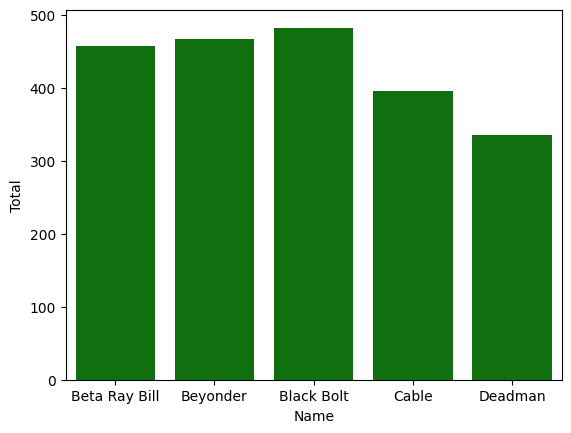

In [54]:
# 14) Green Bar plot of #13
sns.barplot(top_5_good, x='Name', y='Total', color='green')

In [55]:
# 15) Extract Villains with bad alignment 
villains = supers[supers['Alignment'] == 'bad']
villains

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
23,Annihilus,bad,75,80,47,56,59,64,381
...,...,...,...,...,...,...,...,...,...
581,Vulture,bad,63,22,47,56,40,56,284
582,Walrus,bad,50,28,8,50,11,20,167
586,Warp,bad,38,10,23,28,63,50,212
593,Willis Stryker,bad,38,16,23,28,41,60,206


In [56]:
# 16) Top 5 of #15
villains.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
23,Annihilus,bad,75,80,47,56,59,64,381


In [57]:
# 17) Top 5 fastest villains by speed
villains.sort_values('Speed', ascending=False).head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
610,Zoom,bad,50,10,100,28,72,28,288
535,Superboy-Prime,bad,94,100,100,100,100,85,579
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
242,General Zod,bad,94,100,96,100,94,95,579


In [58]:
# 18) Top 5 Supervillains in terms of intelligence
villains.sort_values('Intelligence', ascending=False).head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
338,Lex Luthor,bad,100,10,12,14,10,28,174
555,Tinkerer,bad,100,10,23,14,10,14,171
315,Joker,bad,100,10,12,56,22,90,290
321,Kang,bad,100,48,58,70,71,70,417


In [59]:
# 19) Top 5 most dangerous supervillains by total
villains.sort_values('Total', ascending=False).head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545


[Text(0.5, 1.0, 'Distribution of Speed')]

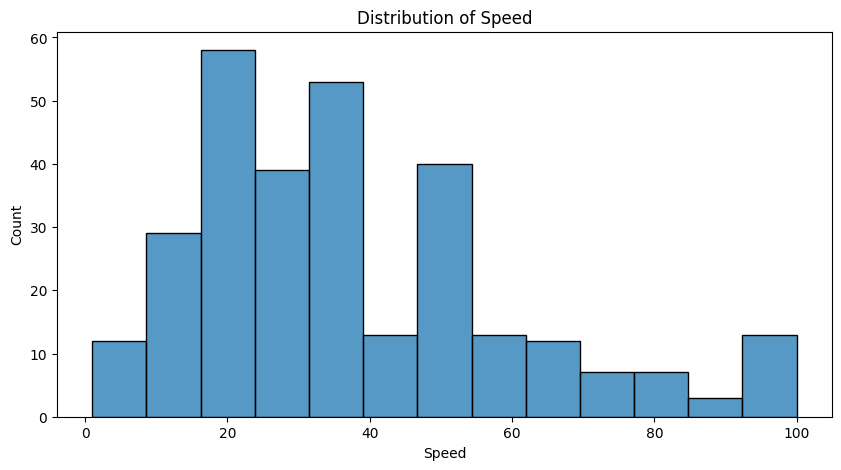

In [65]:
# 20) Histogram for speed of good supers
heros = supers[supers['Alignment'] == 'good']
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=heros, x='Speed', ax=ax).set(title="Distribution of Speed")

[Text(0.5, 1.0, 'Distribution of Combat')]

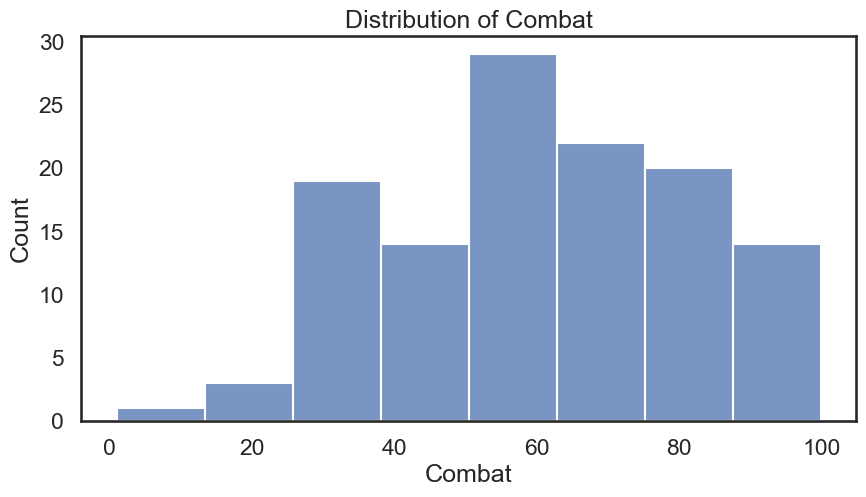

In [81]:
# Distribution of Villains' combat stats
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=villains, x='Combat', ax=ax).set(title="Distribution of Combat")

In [117]:
neutrals = supers[supers['Alignment'] == 'neutral']

[(0.0, 100.0)]

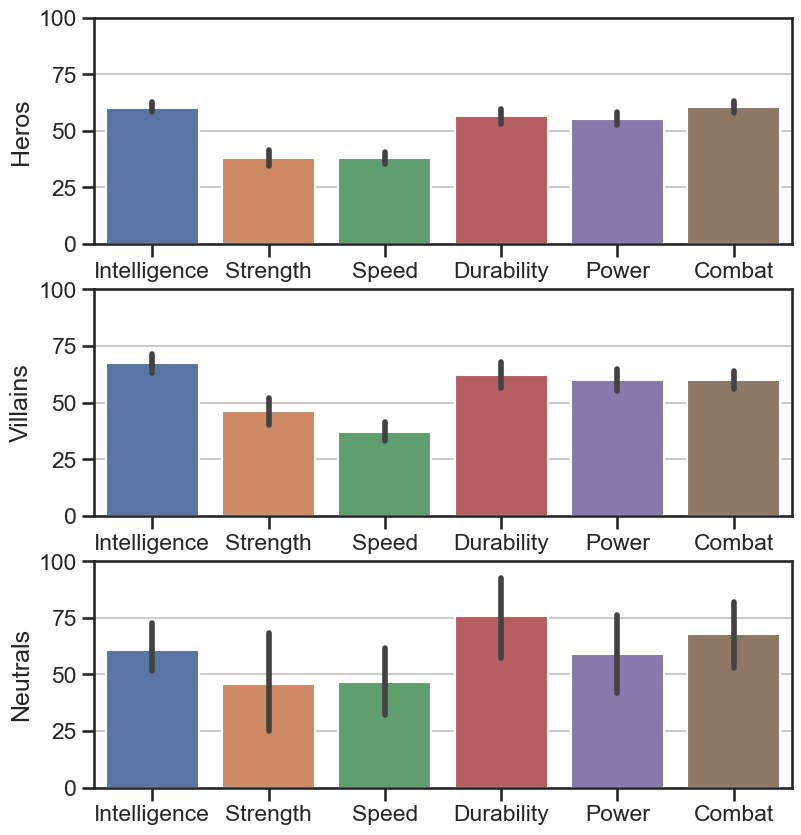

In [118]:
# B1) Comparison of stats based on Alignment
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,10))
sns.set_style("ticks",{'axes.grid' : True})
ax1.set(ylim=(0,100))
sns.barplot(heros.drop(['Total'], axis=1), ax=ax1)
ax1.set_ylabel("Heros")
ax2.set(ylim=(0,100))
sns.barplot(villains.drop(['Total'], axis=1), ax=ax2)
ax2.set_ylabel("Villains")
sns.barplot(neutrals.drop(['Total'], axis=1), ax=ax3)
ax3.set_ylabel("Neutrals")
ax3.set(ylim=(0,100))

In [119]:
neutrals

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
82,Bizarro,neutral,75,95,100,100,95,85,550
186,Deadpool,neutral,50,15,30,100,100,100,395
189,Deathstroke,neutral,75,30,35,100,36,90,366
238,Galactus,neutral,100,100,83,100,100,70,553
318,Juggernaut,neutral,44,100,42,100,74,70,430
357,Man-Bat,neutral,38,18,50,70,33,30,239
451,Raven,neutral,50,10,29,70,62,40,261
454,Red Hood,neutral,75,12,23,28,24,95,257
477,Sandman,neutral,50,75,47,97,62,56,387
544,The Comedian,neutral,63,14,17,10,12,80,196
